# Project: Investigate a Dataset - Exploring the relationship between 2015 movies' genre(s) and revenue.

## Introduction 

Data Set: TMDb Movie Data
Question: What does the genre of a movie allow us to predict about its popularity and revenue?

Using this dataset, I chose to explore the relationship between genre and other variables. Specifically, I was interested in the relationship between genre, revenue, and popularity. When looking at the data, I noticed that "revenue" and "revenue_adj" had identical numbers of films that did not earn any revenue. I chose to use the film's adjusted revenue when calculating total revenue. 

Research Question 1: What is the total count of films for each genre? Films with mulitple genres will have each of their genres count for the total number of each genre. 

Research Question 2: What is the total revenue per genre? 

Research Quesiton 3: Which genre is the most popular according to the popularity data?

By answering these questions I hope to learn if genre can be used to predict the possible success of a movie based on genre as determined by popularity and revenue.


In [2]:
#Use this cell to add libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats 

from matplotlib.ticker import StrMethodFormatter

## Data Wrangling 
In this section, load the data, check for cleanliness, and then trim and clean data set for data analysis.

There are over 200 movies that have repeat titles. We should clean these out of the DF so that they don't skew our data. See the data cleaning section below to view a function used to clean data.

There are 2,040 unique genres, which indicates that some cleaning needs to be done. See the subsection below for cleaning details.

In this section, I loaded the data and checked for cleanliness. 

First, I counted all values in each category to give me a general overview of the data.

Next, I check for the number unique entries in each column that I wanted to focus on for my exploration purposes.

Once this initial investigation was completed, I moved on to cleaning the data.

In [3]:
TMDb_DF = pd.DataFrame
TMDb_DF = pd.read_csv('tmdb-movies.csv')
print(TMDb_DF.head(n=3))

       id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                    

In [4]:
#Counts total rows before cleaning.

count_all = TMDb_DF.count()
print(count_all)

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64


In [5]:
#Check for unique values.

def unique_entries(name):
    count_unique = 0
    checked = []
    for i in range(len(TMDb_DF[name])):
        if TMDb_DF[name][i] not in checked:
            checked.append(TMDb_DF[name][i])
            count_unique+=1
    print('Unique ', name, ' ', count_unique)
        
unique_id=unique_entries('id')
        
unique_title=unique_entries('original_title')

unique_genres=unique_entries('genres')

unique_revenue=unique_entries('revenue')

unique_adjusted_revenue=unique_entries('revenue_adj')


Unique  id   10865
Unique  original_title   10571
Unique  genres   2040
Unique  revenue   4702
Unique  revenue_adj   4840


### Data Cleaning 
After the data wrangling phase I used the feedback from my investigation to make the data more usable for muy purposes. To do this, I used the five following steps. 

Step 1: A funciton was created to separate the genres for each film. This will allow the data to be easier to use for calculations. I separated each genre in the original dataframe, which listed them as one entity. This will help me know if each movie belongs within a genre because it will show "Action" as a separate entity, rather than "Action/Adventure/ScienceFiction/Thriller" being the value. 

Step 2: A function was used to remove rows for duplicate movie titles. This will provide a more accurate measures as well as remove unnecessary data from processing. 

Step 3: Null values and 0s were removed  for adjusted revenue and revenue since my goal is to explore the relationship between adjusted revenue and genre. 

Step 4: A histogram was created for adjusted revenue to see the distribution in order for me to identify outliers and get a general picture of the data. 

Step 5: A histogram was created for popularity to see the distribution in order for me to identify outliers and get a general picture of the data.

Step 6: Outliers were removed for adjusted revenue and popularity to provide a more accurate analysis for the research questions in the next section..

Step 7: I created histograms for the updated series for adjusted revenue and popularity, which had the data removed, provide a snapshot of the distribution of data in order to double check that outliers have been removed. 

In [6]:
# Step 1 function to separate the genres in the TMDb_DF
def split_fucntion(string_name):
    TMDb_adj = TMDb_DF[string_name].str.split('|', expand = True)
    num_col = len(TMDb_adj.columns)
    list_column = []
    for i in range(num_col):
        print(string_name+str(i))
        list_column.append(string_name+str(i))
    TMDb_adj.columns = list_column
    return TMDb_adj

TMDb_genre_split = split_fucntion('genres')
print(TMDb_genre_split)

genres0
genres1
genres2
genres3
genres4
           genres0          genres1          genres2   genres3 genres4
0           Action        Adventure  Science Fiction  Thriller    None
1           Action        Adventure  Science Fiction  Thriller    None
2        Adventure  Science Fiction         Thriller      None    None
3           Action        Adventure  Science Fiction   Fantasy    None
4           Action            Crime         Thriller      None    None
...            ...              ...              ...       ...     ...
10861  Documentary             None             None      None    None
10862       Action        Adventure            Drama      None    None
10863      Mystery           Comedy             None      None    None
10864       Action           Comedy             None      None    None
10865       Horror             None             None      None    None

[10866 rows x 5 columns]


In [7]:
#Step 2 - Create funciton to drop duplicates from columns. Use it for movie titles. df.drop_duplicates(subset=['brand'])
def duplicates_drop(name):
    new_DF = TMDb_DF.drop_duplicates(subset=[name])
    return(new_DF)

Unique_Titles_DF=duplicates_drop('original_title')
count_all = Unique_Titles_DF.count()
print(count_all)

id                      10571
imdb_id                 10561
popularity              10571
budget                  10571
revenue                 10571
original_title          10571
cast                    10497
homepage                 2894
director                10528
tagline                  7799
keywords                 9104
overview                10567
runtime                 10571
genres                  10548
production_companies     9552
release_date            10571
vote_count              10571
vote_average            10571
release_year            10571
budget_adj              10571
revenue_adj             10571
dtype: int64


In [8]:
#Step 3: Null values and 0s were removed  for adjusted revenue. 
Unique_Titles_DF.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      74
homepage                7677
director                  43
tagline                 2772
keywords                1467
overview                   4
runtime                    0
genres                    23
production_companies    1019
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#Drop the missing values from the previous count of missing values specifically for revenue, 
#since this is  the field that I will be focusing on.

Unique_Titles_DF.dropna(axis = 0, how = 'any', subset = ['revenue_adj'])

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


Text(0.5, 1.0, 'Adjusted Revenue Histogram')

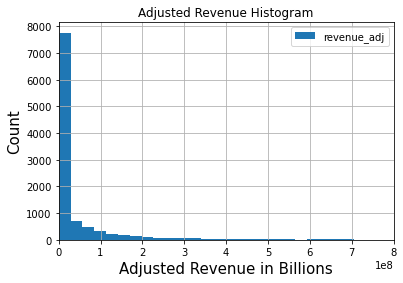

In [12]:
#Step 4: A histogram was created for a series containing just adjusted revenue to see the distribution.
rev_hist_data = pd.Series(Unique_Titles_DF['revenue_adj'])
rev_hist_data.hist(bins = 100, legend = True)
plt.xlabel("Adjusted Revenue in Billions", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.xlim([0.0, 0.8e9])
plt.title("Adjusted Revenue Histogram")



This historgram shows a wide distribution with a lot of outliers. Calculating the z-score and removing them will help provide clearer pictures of what trends exist.

Text(0.5, 1.0, 'Popularity Histogram')

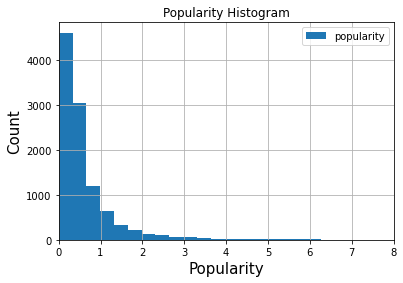

In [13]:
#Step 5: A histogram was created for popularity to see the distribution in order for me to identify outliers 
#and get a general picture of the data.

rev_hist_data = pd.Series(Unique_Titles_DF['popularity'])
rev_hist_data.hist(bins = 100, legend = True)
plt.xlabel("Popularity", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.xlim([0.0, 8])
plt.title("Popularity Histogram")

Similar to the histogram showing the distribution of adjusted revenue, the popularity is clustered around one end, with several outliers. Calcuating the z-score will allow me to remove them to find more accurate trends in the data.

In [11]:
#Step 6: Outliers were removed for adjusted revenue. Any adjusted revenue to popularity over a z-score of three was deleted.
#I did this in the DataFrame rather than the series created in the previous cell for ease of use. 
#I'll recreate the series in the next cell when I recreate a histogram to check my work.

zscore_list = stats.zscore(Unique_Titles_DF['revenue_adj'], axis =0)
Unique_Titles_DF['rev_adj_zcore'] = zscore_list
zscore_list = stats.zscore(Unique_Titles_DF['popularity'], axis =0)
Unique_Titles_DF['popularity_zcore'] = zscore_list
print(Unique_Titles_DF.head(5))

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

<ipython-input-11-9e425f3609ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unique_Titles_DF['rev_adj_zcore'] = zscore_list
<ipython-input-11-9e425f3609ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unique_Titles_DF['popularity_zcore'] = zscore_list


In [12]:
Unique_Titles_DF.drop(Unique_Titles_DF[Unique_Titles_DF['popularity_zcore'] > 3].index, inplace = True) 
Unique_Titles_DF.drop(Unique_Titles_DF[Unique_Titles_DF['rev_adj_zcore'] > 3].index, inplace = True)       
print(Unique_Titles_DF.head(5)) #Check that outliers removed


        id    imdb_id  popularity     budget    revenue     original_title  \
33  296098  tt3682448    3.648210   40000000  162610473    Bridge of Spies   
34  257445  tt1051904    3.644541   58000000  150170815         Goosebumps   
35  264644  tt3170832    3.557846    6000000   35401758               Room   
36  339527  tt1291570    3.358321          0   22354572             Solace   
37  105864  tt1979388    3.339135  175000000  331926147  The Good Dinosaur   

                                                 cast  \
33  Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...   
34  Jack Black|Dylan Minnette|Odeya Rush|Amy Ryan|...   
35  Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...   
36  Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...   
37  Raymond Ochoa|Jack Bright|Jeffrey Wright|Franc...   

                                      homepage          director  \
33                                         NaN  Steven Spielberg   
34            http://www.goosebumps-movie.com/     R

C:\Users\jenni\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\jenni\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Adjusted Revenue Histogram with Outliers Removed')

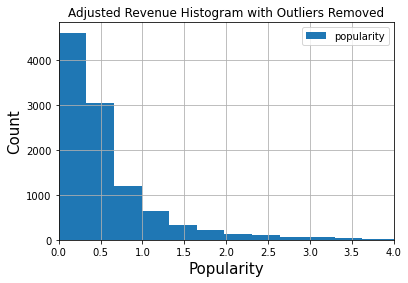

In [14]:
#Step 7: I created histograms for the updated series for adjusted revenue and popularity, 
#which had the data removed, provide a snapshot of the distribution of data in order to double 
#check that outliers have been removed. 
rev_hist_data = pd.Series(Unique_Titles_DF['popularity'])
rev_hist_data.hist(bins = 100, legend = True)
plt.xlabel("Popularity", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.xlim([0.0, 4])
plt.title("Adjusted Revenue Histogram with Outliers Removed")


This distribution looks more spread out, which means that I was successful in removing outliers to clean the data.

Text(0.5, 1.0, 'Populartiy Histogram with Outliers Removed')

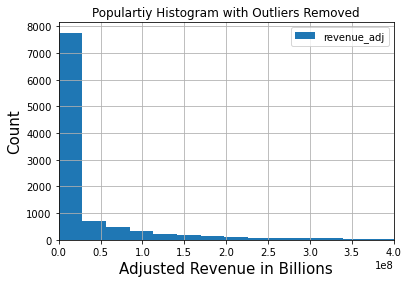

In [15]:
#Step 4: A histogram was created for a series containing just adjusted revenue to see the distribution.
rev_hist_data = pd.Series(Unique_Titles_DF['revenue_adj'])
rev_hist_data.hist(bins = 100, legend = True)
plt.xlabel("Adjusted Revenue in Billions", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.xlim([0.0, 0.4e9])
plt.title("Populartiy Histogram with Outliers Removed")

Similar to the popularity histogram above, this distribution looks a little cleaner, meaning that removing the outliers was successful.

## Exploratory Data Analysis 
After cleaning the data I started to explore a few research questions. I noticed there's a lot of movies that have no revenue gained. Movie production companies would definitely want to invest in movies they think would turn a profit. The following research questions should help provide some insight on movies that might turn a profit. 

Question 1: What is the total count of films for each genre? This will help me identify the most common genres that are being produced. This will help me know what type of films movie production companies are making. Knowing this information may help movie production companies decide which types of movies to make.

Question 2:  Which genres earned the most reveneue as a total? This will help me understand which genres make the most money. By comparing this data to the answer to Question 1, I can see if the most common films are the ones that make the most money. Knowing which genres tend to generate the most income will help in the process of deciding what types of movies a movie production company should make. 

Question 3: Which genre is the most popular? I thought it might be interesting to see if the most popular movies are also the most common or the ones that make the most revenue. This would provide a lot of insight into what types of movies people want to see, which would be helpful in the decision of what type of movie to make.

### Research Quesiton 1:
What is the total count of films for each genre? Films with mulitple genres will have each of their genres count for the total number of each genre.

Action             2313
Adventure          1424
Animation           688
Comedy             3731
Crime              1312
Documentary         513
Drama              4624
Family             1191
Fantasy             882
Foreign             184
History             326
Horror             1558
Music               397
Mystery             766
Romance            1662
Science Fiction    1188
TV Movie            162
Thriller           2799
War                 264
Western             163
dtype: int64


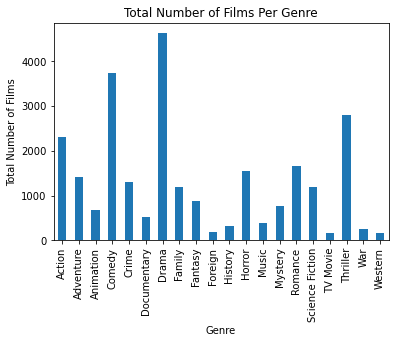

In [16]:
#Research Quesiton 1
#Use this cell to create 1D and 2D objects to explore

df_genres= Unique_Titles_DF['genres'].str.get_dummies(sep= '|')

def count_genre():
    count_total = df_genres.sum(axis=0)
    count_total.plot(kind='bar', xlabel = 'Genre', ylabel = 'Total Number of Films', title = 'Total Number of Films Per Genre')
    return count_total
df_count_genres = pd.DataFrame()
df_count_genres = count_genre()

print (df_count_genres)

This bar chart shows that Drama, Comedy, Action, Thriller, Romance, and Horror are the top five types of films made in 2015. 

### Research Quesiton 2:
Which genre earned the most revenue as a total?

             genres  total_revenue
0            Action   1.065136e+11
1         Adventure   8.002889e+10
2         Animation   2.432267e+10
3            Comedy   1.347449e+11
4             Crime   5.634086e+10
5       Documentary   1.071788e+09
6             Drama   1.359488e+11
7            Family   5.077277e+10
8           Fantasy   4.282960e+10
9           Foreign   3.354458e+08
10          History   1.129373e+10
11           Horror   2.787585e+10
12            Music   1.271570e+10
13          Mystery   2.997166e+10
14          Romance   5.955229e+10
15  Science Fiction   4.371637e+10
16         TV Movie   5.838910e+07
17         Thriller   9.999394e+10
18              War   1.174251e+10
19          Western   4.639823e+09


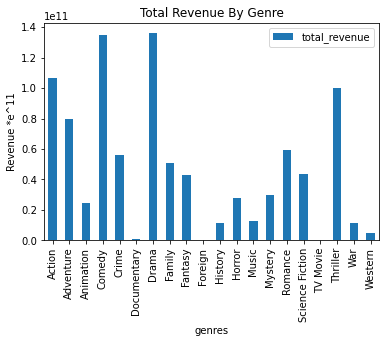

In [21]:
df_tot_rev = pd.DataFrame()
df_tot_rev['genres'] = df_genres.columns
df_tot_rev['total_revenue'] = [Unique_Titles_DF[Unique_Titles_DF['genres'].str.contains(x, na=False)]['revenue_adj'].sum() for x in df_genres.columns]

df_tot_rev.plot(kind = 'bar', x='genres', y='total_revenue', title = "Total Revenue By Genre", ylabel = 'Revenue *e^11', legend = True)

print (df_tot_rev)

According to the bar chart, the genres that made the top 5 most revenue are Drama, Comeday, Action, Thriller, Adventure, and Romance.

### Research Question 3:
Which genre is the most popular?

             genres   popularity
0            Action  1410.335360
1         Adventure   915.659568
2         Animation   421.908980
3            Comedy  1961.164949
4             Crime   837.977653
5       Documentary    92.370925
6             Drama  2405.935825
7            Family   686.872837
8           Fantasy   581.509783
9           Foreign    34.844730
10          History   165.138340
11           Horror   677.989990
12            Music   175.323502
13          Mystery   455.952754
14          Romance   912.043466
15  Science Fiction   695.376963
16         TV Movie    44.189771
17         Thriller  1650.136731
18              War   148.321087
19          Western    72.245220


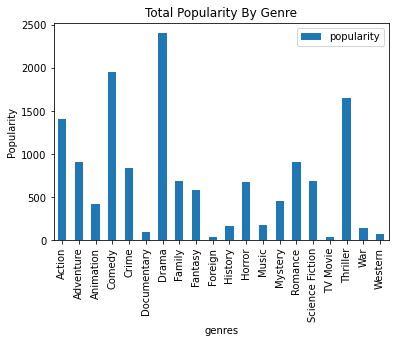

In [22]:
df_tot_popularity = pd.DataFrame()
df_tot_popularity['genres'] = df_genres.columns
df_tot_popularity['popularity'] = [Unique_Titles_DF[Unique_Titles_DF['genres'].str.contains(x, na=False)]['popularity'].sum() for x in df_genres.columns]

df_tot_popularity.plot(kind = 'bar', x='genres', y='popularity', title = "Total Popularity By Genre", ylabel = 'Popularity', legend = True)

print (df_tot_popularity)

The chart above indicates that Drama, Comedy, Triller, Action, and Adventure are the most popular films made. 

## Conclusions 


<AxesSubplot:title={'center':'Total Revenue'}, xlabel='genres'>

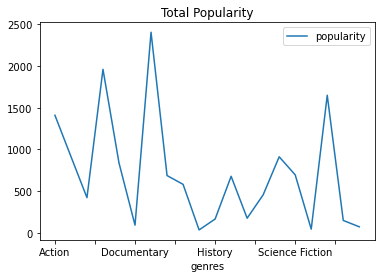

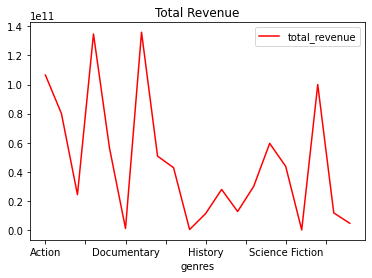

In [18]:
df_genre_pop_rev = pd.DataFrame()
df_genre_pop_rev['genres'] = df_genres.columns
df_genre_pop_rev['total_revenue'] = [Unique_Titles_DF[Unique_Titles_DF['genres'].str.contains(x, na=False)]['revenue_adj'].sum() for x in df_genres.columns]
df_genre_pop_rev['popularity'] = [Unique_Titles_DF[Unique_Titles_DF['genres'].str.contains(x, na=False)]['popularity'].sum() for x in df_genres.columns]

df_genre_pop_rev.plot(kind = 'line', x='genres', y='popularity', title = "Total Popularity")
df_genre_pop_rev.plot(kind = 'line', x='genres', y='total_revenue', title = "Total Revenue", color='red')


Based on the data provided, and after analyzing the charts above, genre appears to widely vary in total popularity and total revenue earned. Action, Adventure, Dramas, Comdedies, and Thrillers were the most popular movies, and also had the most revenue in total. Interestingly, there were significantly fewer Action and Adventure movies produced compared to Comedies and Dramas, yet they were comparable in revenue. This information could be invaluable to movie production companies looking to determine which movies they should produce in upcoming years because it would provide them with a general idea of what genres make the most money, are the most common, and are the most popular. 

One prediction that could be made using this analysis is that Action, Adventure, Comedy, Drama, and/or Thirller movies in 2015 were likely to bring in higher revenue and be more popular than any other genre. Documentaries, Westerns, Foreign Films, and TV movies brought in significantly less money and were less likely to be popular in 2015. This data could be compared to data from other years to see if there is a trend where certain genres tend to bring in higher revenue, and then that data could be used to make informed choices about the types of movies a production company should persue in order to make higher profit margins.

Due to the limited number of films included in the data set, and it's limitation to the year of 2015, solid predictions for the overall popularity of movies may not be fully understood. This dataset may be skewed due to the films that were produced that year, revenue may have been impacted by unkown economic or other extraneous variables, and popularity may not paint a perfect picture of how popular the movie was compared to movies of other years.